#### Observing Covid Outlier

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objs as go
import calplot
import calendar
import numpy as np
#import pandas_profiling as pp
import sweetviz as sv

In [66]:
data = pd.read_csv("Dataset_Post_Interpolation.csv")
data

,Date,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price
0,2016-12-15,91.5,4516.18,4334.960,181.220,50.90,51.97,52.91,53.62,0.905,2,0.1,50.90,50.90
1,2016-12-16,91.5,4515.22,4341.639,173.581,51.90,52.95,53.87,54.56,0.948,2,0.2,50.90,51.90
2,2016-12-19,91.4,4514.26,4348.318,165.942,52.12,53.06,53.90,54.55,0.992,2,0.5,51.90,52.12
3,2016-12-20,91.3,4513.30,4354.997,158.303,52.23,53.30,54.19,54.90,1.035,2,0.1,52.12,52.23
4,2016-12-21,91.2,4512.34,4361.676,150.664,52.49,53.38,54.10,54.66,1.079,2,0.4,52.23,52.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,2021-12-09,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.1,72.36,70.94
1277,2021-12-10,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.4,70.94,71.67
1278,2021-12-13,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.67,71.29
1279,2021-12-14,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.29,70.73


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1281 non-null   object 
 1   Utilization of Refinery in %  1281 non-null   float64
 2   Production                    1281 non-null   float64
 3   Demand                        1281 non-null   float64
 4   Gap                           1281 non-null   float64
 5   Contract 1 FP                 1281 non-null   float64
 6   Contract 2 FP                 1281 non-null   float64
 7   Contract 3 FP                 1281 non-null   float64
 8   Contract 4 FP                 1281 non-null   float64
 9   Global Sale (in millions)     1281 non-null   float64
 10  Seasonal Demand               1281 non-null   int64  
 11  REIF                          1281 non-null   float64
 12  Last Day's Price              1281 non-null   float64
 13  Pri

In [68]:
# change object to datetime for date
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          1281 non-null   datetime64[ns]
 1   Utilization of Refinery in %  1281 non-null   float64       
 2   Production                    1281 non-null   float64       
 3   Demand                        1281 non-null   float64       
 4   Gap                           1281 non-null   float64       
 5   Contract 1 FP                 1281 non-null   float64       
 6   Contract 2 FP                 1281 non-null   float64       
 7   Contract 3 FP                 1281 non-null   float64       
 8   Contract 4 FP                 1281 non-null   float64       
 9   Global Sale (in millions)     1281 non-null   float64       
 10  Seasonal Demand               1281 non-null   int64         
 11  REIF                          

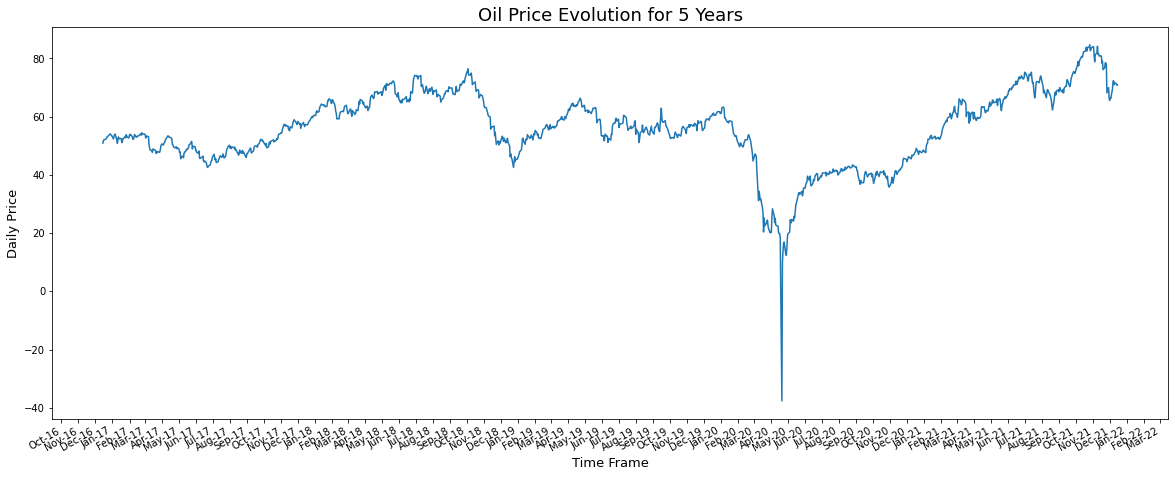

In [69]:
#observing the covid part
# build the frame
fig,ax = plt.subplots(figsize=(20,8))

date = data['Date']
value = data['Price']

# give the title, x and y axis names
plt.title("Oil Price Evolution for 5 Years",fontsize=18)
plt.xlabel("Time Frame",fontsize=13)
plt.ylabel("Daily Price",fontsize=13)

# display formatting
year_month_separator = mdates.MonthLocator()
year_month_formatter = mdates.DateFormatter("%b-%y")

ax.xaxis.set_major_locator(year_month_separator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(date,value);

# auto format tilt the x-axis labels
fig.autofmt_xdate()

In [ ]:
'''
March 2020 to July 2020 - 4 months is where the outlier is
'''

#### Handling Covid Window

In [71]:
data = pd.DataFrame(data)
data

,Date,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price
0,2016-12-15,91.5,4516.18,4334.960,181.220,50.90,51.97,52.91,53.62,0.905,2,0.1,50.90,50.90
1,2016-12-16,91.5,4515.22,4341.639,173.581,51.90,52.95,53.87,54.56,0.948,2,0.2,50.90,51.90
2,2016-12-19,91.4,4514.26,4348.318,165.942,52.12,53.06,53.90,54.55,0.992,2,0.5,51.90,52.12
3,2016-12-20,91.3,4513.30,4354.997,158.303,52.23,53.30,54.19,54.90,1.035,2,0.1,52.12,52.23
4,2016-12-21,91.2,4512.34,4361.676,150.664,52.49,53.38,54.10,54.66,1.079,2,0.4,52.23,52.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,2021-12-09,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.1,72.36,70.94
1277,2021-12-10,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.4,70.94,71.67
1278,2021-12-13,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.67,71.29
1279,2021-12-14,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.29,70.73


In [72]:
#filter covid dates to see the index values: Index 821 is where covid drop starts, till incex 906 i.e. July 30th
data[(data['Date']>'2020-02-28')&(data['Date']<'2020-07-01')]

,Date,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price
821,2020-03-02,86.80,4347.588,4129.337,218.251,46.75,46.92,47.05,47.14,3.565,2,0.1,44.76,46.75
822,2020-03-03,86.70,4348.842,4130.785,218.057,47.18,47.33,47.45,47.52,3.575,2,0.1,46.75,47.18
823,2020-03-04,86.60,4350.096,4132.233,217.863,46.78,46.95,47.11,47.22,3.584,2,0.5,47.18,46.78
824,2020-03-05,86.50,4351.349,4133.681,217.669,45.90,46.06,46.21,46.34,3.593,2,0.5,46.78,45.90
825,2020-03-06,86.40,4352.603,4135.128,217.474,41.28,41.51,41.77,42.04,3.603,2,0.1,45.90,41.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2020-06-24,75.14,4449.131,4246.605,202.527,38.01,38.21,38.39,38.56,4.328,1,0.2,40.37,38.01
903,2020-06-25,75.32,4450.385,4248.052,202.333,38.72,38.91,39.08,39.26,4.338,1,0.3,38.01,38.72
904,2020-06-26,75.50,4451.639,4249.500,202.139,38.49,38.65,38.80,38.94,4.347,1,0.2,38.72,38.49
905,2020-06-29,75.90,4452.892,4250.948,201.944,39.70,39.81,39.92,40.04,4.357,1,0.5,38.49,39.70


In [73]:
data_drop_date = data.drop(columns=['Date'])
data_drop_date

,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price
0,91.5,4516.18,4334.960,181.220,50.90,51.97,52.91,53.62,0.905,2,0.1,50.90,50.90
1,91.5,4515.22,4341.639,173.581,51.90,52.95,53.87,54.56,0.948,2,0.2,50.90,51.90
2,91.4,4514.26,4348.318,165.942,52.12,53.06,53.90,54.55,0.992,2,0.5,51.90,52.12
3,91.3,4513.30,4354.997,158.303,52.23,53.30,54.19,54.90,1.035,2,0.1,52.12,52.23
4,91.2,4512.34,4361.676,150.664,52.49,53.38,54.10,54.66,1.079,2,0.4,52.23,52.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.1,72.36,70.94
1277,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.4,70.94,71.67
1278,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.67,71.29
1279,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.29,70.73


In [74]:
#start date TILL COVID period i.e. 820 rows, since covid starts from 821
start = data_drop_date.iloc[:821]
start

,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price
0,91.5,4516.180,4334.960,181.220,50.90,51.97,52.91,53.62,0.905,2,0.1,50.90,50.90
1,91.5,4515.220,4341.639,173.581,51.90,52.95,53.87,54.56,0.948,2,0.2,50.90,51.90
2,91.4,4514.260,4348.318,165.942,52.12,53.06,53.90,54.55,0.992,2,0.5,51.90,52.12
3,91.3,4513.300,4354.997,158.303,52.23,53.30,54.19,54.90,1.035,2,0.1,52.12,52.23
4,91.2,4512.340,4361.676,150.664,52.49,53.38,54.10,54.66,1.079,2,0.4,52.23,52.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,87.7,4341.320,4122.099,219.222,51.43,51.58,51.67,51.72,3.518,2,0.2,53.38,51.43
817,87.5,4342.574,4123.546,219.027,49.90,50.06,50.13,50.14,3.528,2,0.1,51.43,49.90
818,87.3,4343.828,4124.994,218.833,48.73,48.88,48.96,48.99,3.537,2,0.2,49.90,48.73
819,87.1,4345.081,4126.442,218.639,47.09,47.29,47.44,47.55,3.546,2,0.4,48.73,47.09


In [75]:
# Covid Period 821 to 906
covid_period = data_drop_date.iloc[821:907]
covid_period

,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price
821,86.80,4347.588,4129.337,218.251,46.75,46.92,47.05,47.14,3.565,2,0.1,44.76,46.75
822,86.70,4348.842,4130.785,218.057,47.18,47.33,47.45,47.52,3.575,2,0.1,46.75,47.18
823,86.60,4350.096,4132.233,217.863,46.78,46.95,47.11,47.22,3.584,2,0.5,47.18,46.78
824,86.50,4351.349,4133.681,217.669,45.90,46.06,46.21,46.34,3.593,2,0.5,46.78,45.90
825,86.40,4352.603,4135.128,217.474,41.28,41.51,41.77,42.04,3.603,2,0.1,45.90,41.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,75.14,4449.131,4246.605,202.527,38.01,38.21,38.39,38.56,4.328,1,0.2,40.37,38.01
903,75.32,4450.385,4248.052,202.333,38.72,38.91,39.08,39.26,4.338,1,0.3,38.01,38.72
904,75.50,4451.639,4249.500,202.139,38.49,38.65,38.80,38.94,4.347,1,0.2,38.72,38.49
905,75.90,4452.892,4250.948,201.944,39.70,39.81,39.92,40.04,4.357,1,0.5,38.49,39.70


In [76]:
# from 907 to 992 i.e. 86 values after covid period to be replace in the covid period. So basically 'end' will replace covid part 'covid_period'
end = data_drop_date.iloc[907:993]
end

,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price
907,76.70,4455.400,4253.843,201.556,39.82,39.920,40.090,40.230,4.375,1,0.4,39.27,39.82
908,77.10,4456.653,4255.291,201.362,40.65,40.760,40.910,41.020,4.385,1,0.5,39.82,40.65
909,77.50,4457.907,4256.739,201.168,40.64,40.745,40.895,41.005,4.394,1,0.3,40.65,40.64
910,77.62,4459.160,4258.187,200.974,40.63,40.730,40.880,40.990,4.404,1,0.4,40.64,40.63
911,77.74,4460.414,4259.634,200.780,40.62,40.700,40.840,40.940,4.413,1,0.5,40.63,40.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,74.60,4556.943,4371.111,185.832,39.85,40.150,40.450,40.730,5.138,2,0.1,40.64,39.85
989,74.74,4558.196,4372.558,185.638,38.56,38.890,39.220,39.540,5.148,2,0.2,39.85,38.56
990,74.88,4559.450,4374.006,185.444,39.57,39.870,40.180,40.460,5.157,2,0.4,38.56,39.57
991,75.02,4560.704,4375.454,185.250,37.39,37.720,38.080,38.430,5.167,2,0.4,39.57,37.39


In [77]:
#End of time frame
last = data_drop_date.iloc[993:]
last

,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price
993,75.30,4563.211,4378.349,184.861,35.79,36.15,36.57,37.00,5.186,2,0.2,36.17,35.79
994,75.14,4564.464,4379.797,184.667,36.81,37.18,37.63,38.08,5.195,2,0.1,35.79,36.81
995,74.98,4565.718,4381.245,184.473,37.66,37.99,38.41,38.83,5.204,2,0.1,36.81,37.66
996,74.82,4566.972,4382.693,184.279,39.15,39.47,39.86,40.24,5.214,2,0.5,37.66,39.15
997,74.66,4568.225,4384.140,184.085,38.79,39.11,39.48,39.87,5.223,2,0.3,39.15,38.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,88.80,4618.370,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.1,72.36,70.94
1277,88.80,4618.370,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.4,70.94,71.67
1278,88.80,4618.370,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.67,71.29
1279,88.80,4618.370,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.29,70.73


In [78]:
# here covid_period is replaced by 'end' period
complete = pd.concat([start,end,end,last])
complete

,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price
0,91.5,4516.18,4334.960,181.220,50.90,51.97,52.91,53.62,0.905,2,0.1,50.90,50.90
1,91.5,4515.22,4341.639,173.581,51.90,52.95,53.87,54.56,0.948,2,0.2,50.90,51.90
2,91.4,4514.26,4348.318,165.942,52.12,53.06,53.90,54.55,0.992,2,0.5,51.90,52.12
3,91.3,4513.30,4354.997,158.303,52.23,53.30,54.19,54.90,1.035,2,0.1,52.12,52.23
4,91.2,4512.34,4361.676,150.664,52.49,53.38,54.10,54.66,1.079,2,0.4,52.23,52.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.1,72.36,70.94
1277,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.4,70.94,71.67
1278,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.67,71.29
1279,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.29,70.73


In [79]:
complete = complete.reset_index()
complete

,index,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price
0,0,91.5,4516.18,4334.960,181.220,50.90,51.97,52.91,53.62,0.905,2,0.1,50.90,50.90
1,1,91.5,4515.22,4341.639,173.581,51.90,52.95,53.87,54.56,0.948,2,0.2,50.90,51.90
2,2,91.4,4514.26,4348.318,165.942,52.12,53.06,53.90,54.55,0.992,2,0.5,51.90,52.12
3,3,91.3,4513.30,4354.997,158.303,52.23,53.30,54.19,54.90,1.035,2,0.1,52.12,52.23
4,4,91.2,4512.34,4361.676,150.664,52.49,53.38,54.10,54.66,1.079,2,0.4,52.23,52.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,1276,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.1,72.36,70.94
1277,1277,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.4,70.94,71.67
1278,1278,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.67,71.29
1279,1279,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.29,70.73


In [80]:
complete.columns

Index(['index', 'Utilization of Refinery in %', 'Production', 'Demand', 'Gap',
       'Contract 1 FP', 'Contract 2 FP', 'Contract 3 FP', 'Contract 4 FP',
       'Global Sale (in millions)', 'Seasonal Demand', 'REIF',
       'Last Day's Price', 'Price'],
      dtype='object')

In [81]:
complete = complete.drop(columns=['index'])
complete

,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price
0,91.5,4516.18,4334.960,181.220,50.90,51.97,52.91,53.62,0.905,2,0.1,50.90,50.90
1,91.5,4515.22,4341.639,173.581,51.90,52.95,53.87,54.56,0.948,2,0.2,50.90,51.90
2,91.4,4514.26,4348.318,165.942,52.12,53.06,53.90,54.55,0.992,2,0.5,51.90,52.12
3,91.3,4513.30,4354.997,158.303,52.23,53.30,54.19,54.90,1.035,2,0.1,52.12,52.23
4,91.2,4512.34,4361.676,150.664,52.49,53.38,54.10,54.66,1.079,2,0.4,52.23,52.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.1,72.36,70.94
1277,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.4,70.94,71.67
1278,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.67,71.29
1279,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.29,70.73


In [82]:
complete['Date'] = data['Date']
complete

,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price,Date
0,91.5,4516.18,4334.960,181.220,50.90,51.97,52.91,53.62,0.905,2,0.1,50.90,50.90,2016-12-15
1,91.5,4515.22,4341.639,173.581,51.90,52.95,53.87,54.56,0.948,2,0.2,50.90,51.90,2016-12-16
2,91.4,4514.26,4348.318,165.942,52.12,53.06,53.90,54.55,0.992,2,0.5,51.90,52.12,2016-12-19
3,91.3,4513.30,4354.997,158.303,52.23,53.30,54.19,54.90,1.035,2,0.1,52.12,52.23,2016-12-20
4,91.2,4512.34,4361.676,150.664,52.49,53.38,54.10,54.66,1.079,2,0.4,52.23,52.49,2016-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.1,72.36,70.94,2021-12-09
1277,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.4,70.94,71.67,2021-12-10
1278,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.67,71.29,2021-12-13
1279,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.29,70.73,2021-12-14


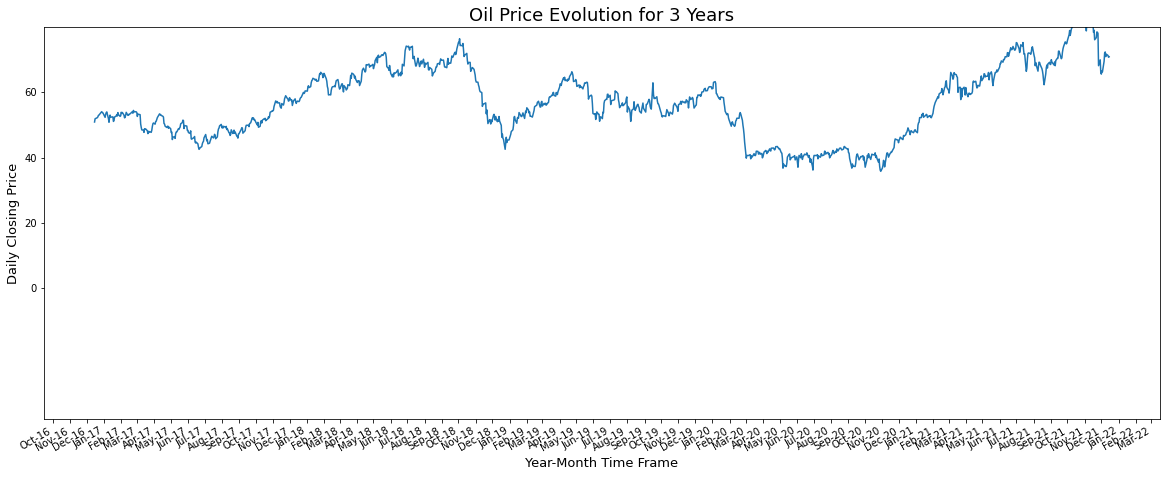

In [83]:
## OBSERVE POST COVID TREATED DATASET
# build the frame
fig,ax = plt.subplots(figsize=(20,8))

date = complete['Date']
value = complete['Price']

# give the title, x and y axis names
plt.title("Oil Price Evolution for 3 Years",fontsize=18)
plt.xlabel("Year-Month Time Frame",fontsize=13)
plt.ylabel("Daily Closing Price",fontsize=13)

# display formatting
year_month_separator = mdates.MonthLocator()
year_month_formatter = mdates.DateFormatter("%b-%y")

ax.xaxis.set_major_locator(year_month_separator)
ax.xaxis.set_major_formatter(year_month_formatter)

#plt.yticks(np.arange(value.min(), value.max(), 3))
plt.ylim(-40, 80)
plt.yticks(np.arange(0, 80, 20))

ax.plot(date,value);

# auto format tilt the x-axis labels
fig.autofmt_xdate()

In [85]:
complete = complete.set_index(['Date'])
complete

,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price
Date,,,,,,,,,,,,,
2016-12-15,91.5,4516.18,4334.960,181.220,50.90,51.97,52.91,53.62,0.905,2,0.1,50.90,50.90
2016-12-16,91.5,4515.22,4341.639,173.581,51.90,52.95,53.87,54.56,0.948,2,0.2,50.90,51.90
2016-12-19,91.4,4514.26,4348.318,165.942,52.12,53.06,53.90,54.55,0.992,2,0.5,51.90,52.12
2016-12-20,91.3,4513.30,4354.997,158.303,52.23,53.30,54.19,54.90,1.035,2,0.1,52.12,52.23
2016-12-21,91.2,4512.34,4361.676,150.664,52.49,53.38,54.10,54.66,1.079,2,0.4,52.23,52.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-09,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.1,72.36,70.94
2021-12-10,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.4,70.94,71.67
2021-12-13,88.8,4618.37,4442.050,176.320,66.18,65.85,65.49,65.15,5.600,2,0.3,71.67,71.29


In [86]:
complete.to_csv("Dataset_is_Vaccinated.csv")

#### EDA - Linear Trends

In [87]:
complete.corr()

,Utilization of Refinery in %,Production,Demand,Gap,Contract 1 FP,Contract 2 FP,Contract 3 FP,Contract 4 FP,Global Sale (in millions),Seasonal Demand,REIF,Last Day's Price,Price
Utilization of Refinery in %,1.000000,0.052108,0.090008,-0.183008,0.443950,0.446333,0.449907,0.455271,-0.602380,-0.168810,-0.045577,0.444799,0.442760
Production,0.052108,1.000000,0.975814,-0.460548,0.347785,0.347753,0.349340,0.353108,0.129225,-0.019120,-0.005005,0.345024,0.349043
Demand,0.090008,0.975814,1.000000,-0.643449,0.291989,0.294504,0.298723,0.305206,0.017578,-0.014859,-0.014853,0.289686,0.293163
Gap,-0.183008,-0.460548,-0.643449,1.000000,0.032232,0.021908,0.010334,-0.002795,0.381137,-0.006617,0.042783,0.031916,0.031869
Contract 1 FP,0.443950,0.347785,0.291989,0.032232,1.000000,0.999577,0.998399,0.997028,0.063031,-0.020233,-0.015770,0.993986,0.999159
Contract 2 FP,0.446333,0.347753,0.294504,0.021908,0.999577,1.000000,0.999573,0.998660,0.053827,-0.014047,-0.017533,0.993521,0.998714
Contract 3 FP,0.449907,0.349340,0.298723,0.010334,0.998399,0.999573,1.000000,0.999690,0.042469,-0.008164,-0.019430,0.992329,0.997537
Contract 4 FP,0.455271,0.353108,0.305206,-0.002795,0.997028,0.998660,0.999690,1.000000,0.029470,-0.003927,-0.021500,0.990995,0.996175
Global Sale (in millions),-0.602380,0.129225,0.017578,0.381137,0.063031,0.053827,0.042469,0.029470,1.000000,-0.031109,0.052054,0.064377,0.067084
Seasonal Demand,-0.168810,-0.019120,-0.014859,-0.006617,-0.020233,-0.014047,-0.008164,-0.003927,-0.031109,1.000000,-0.013370,-0.016008,-0.017642


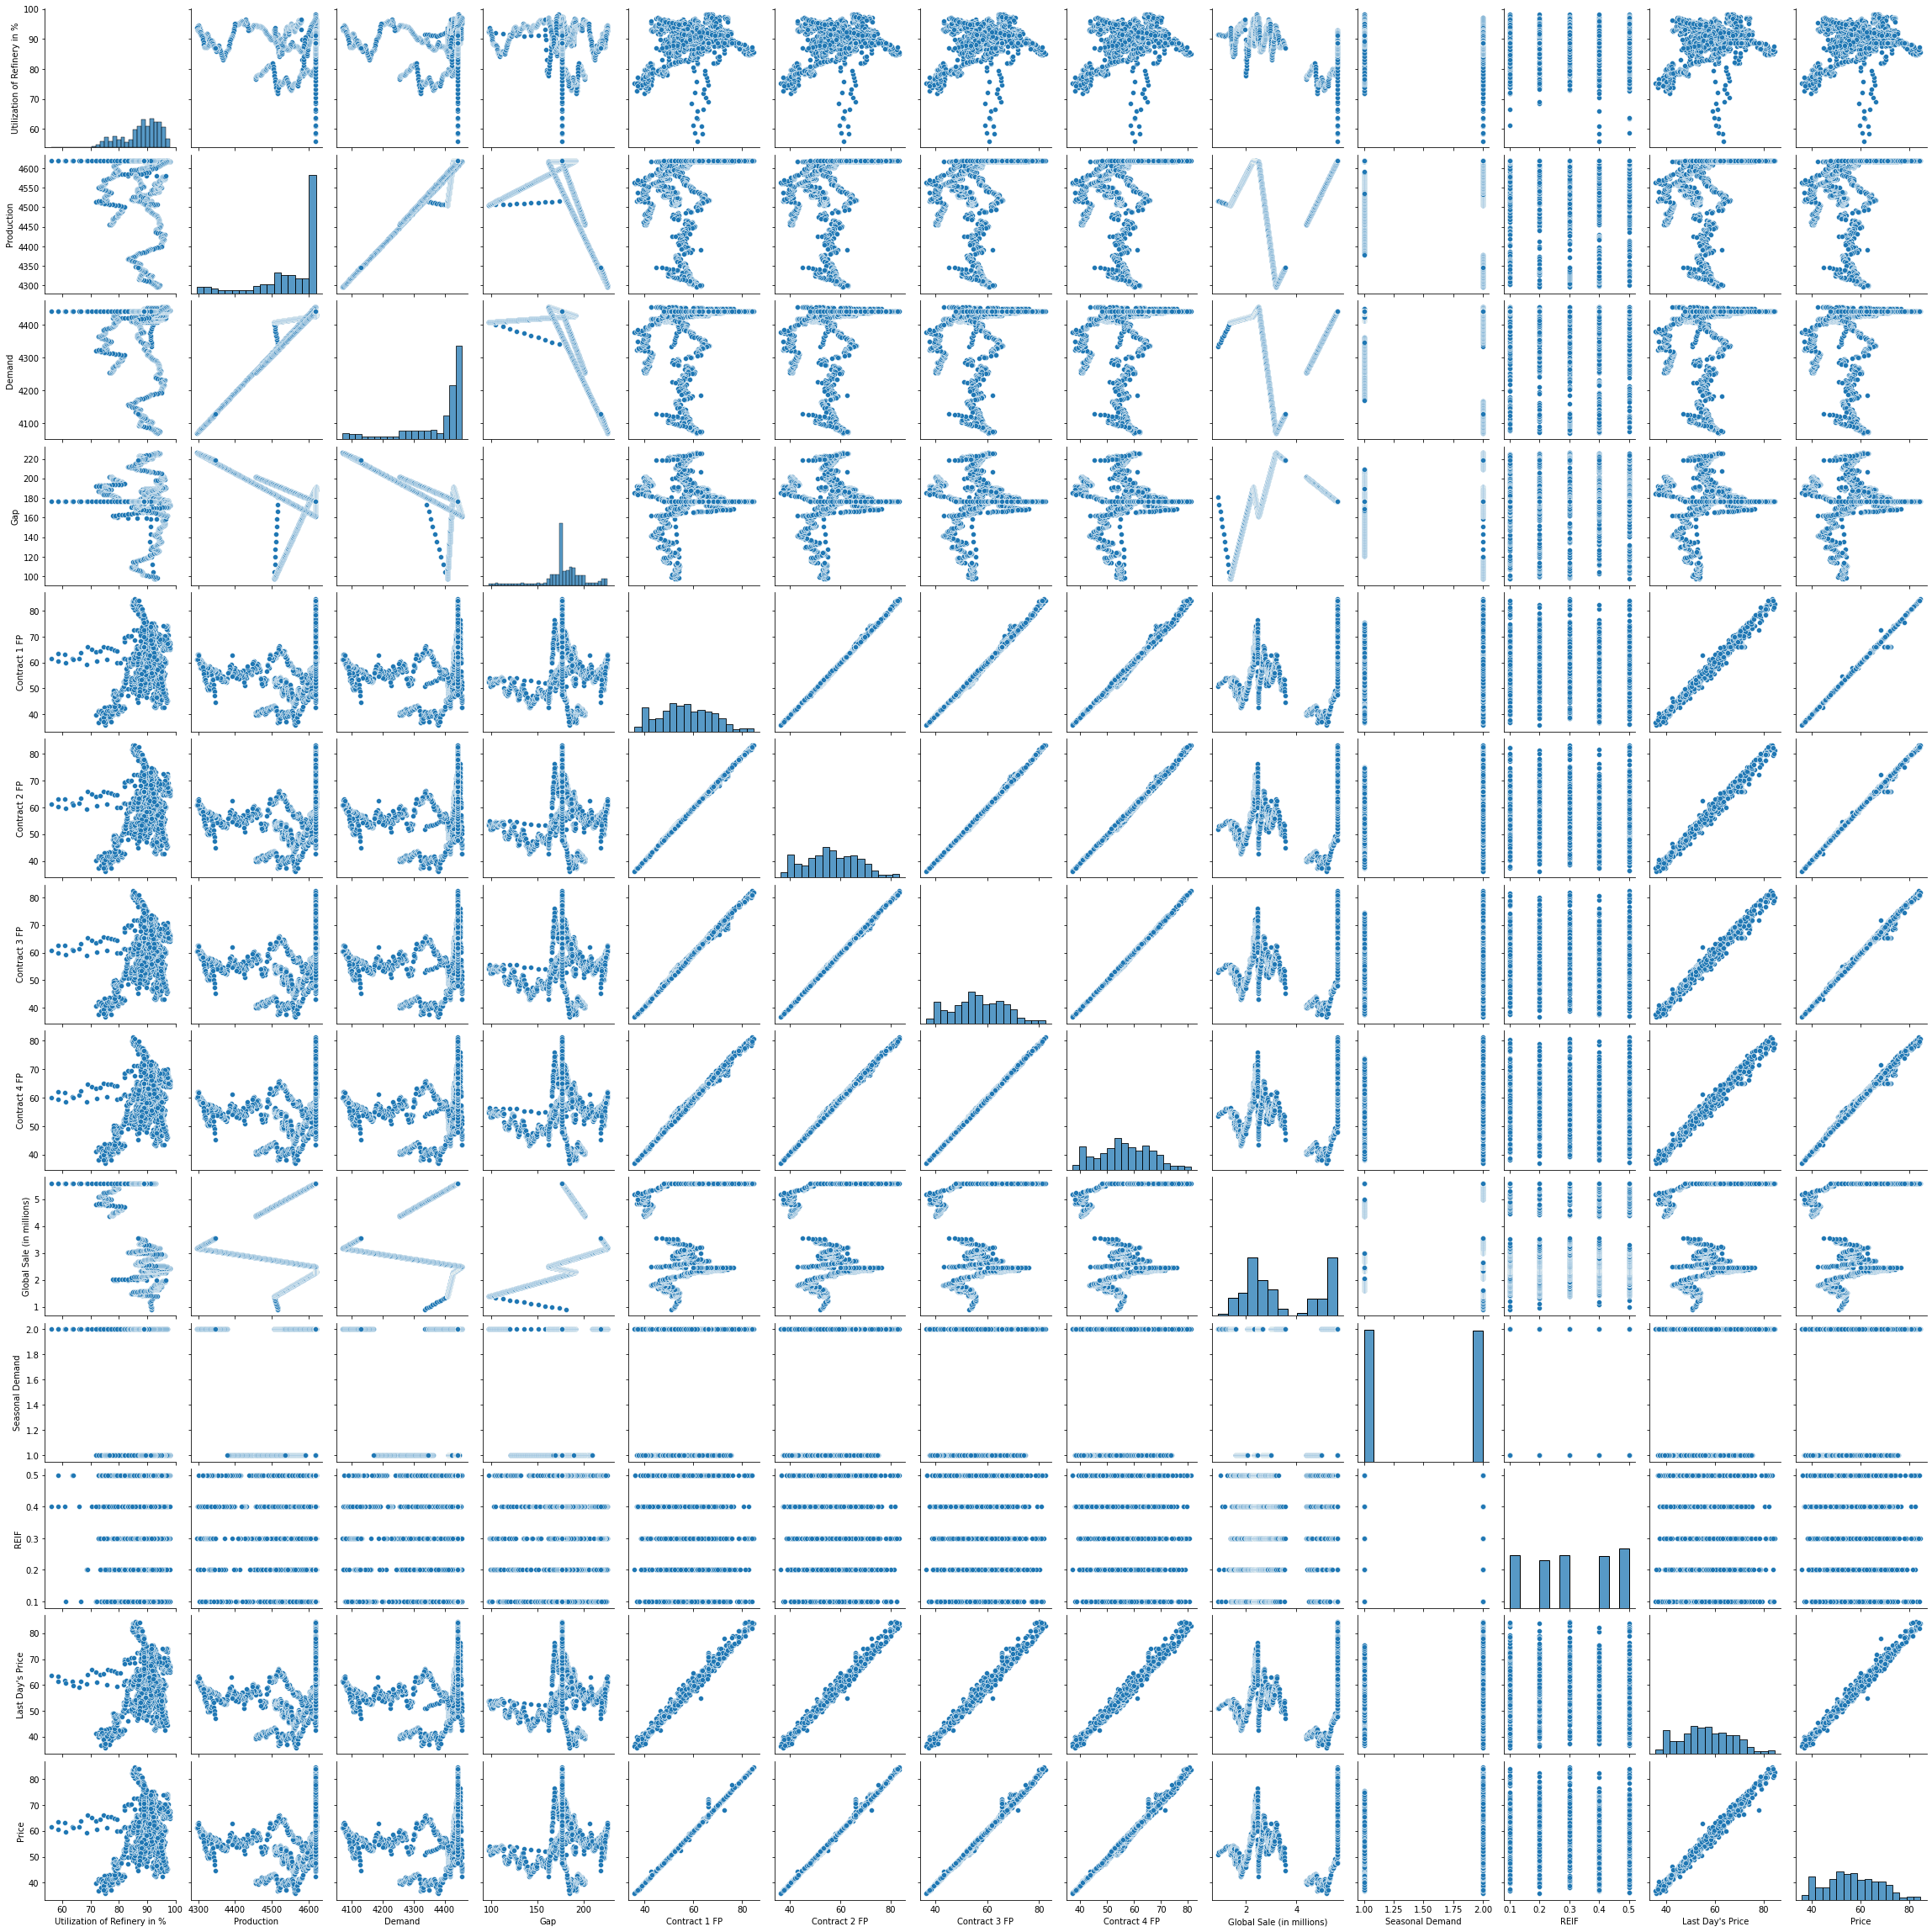

In [88]:
sns.pairplot(complete)

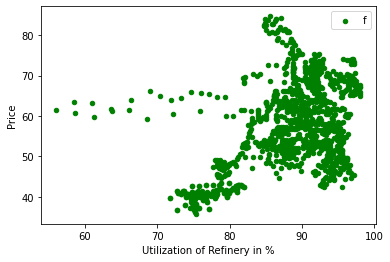

In [89]:
bx = complete.plot(kind='scatter', x='Utilization of Refinery in %',y='Price',color = 'Green',label ='f')

True


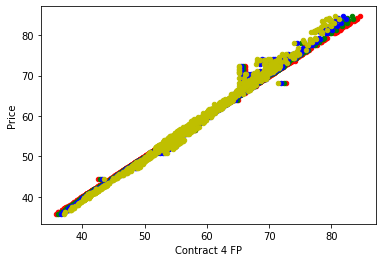

In [90]:
ax1 = complete.plot(kind='scatter', x='Contract 1 FP', y='Price', color='r')    
ax2 = complete.plot(kind='scatter', x='Contract 2 FP', y='Price', color='g', ax=ax1)    
ax3 = complete.plot(kind='scatter', x='Contract 3 FP', y='Price', color='b', ax=ax1)
ax4 = complete.plot(kind='scatter', x='Contract 4 FP', y='Price', color='y', ax=ax1)

print(ax1 == ax2 == ax3 ==ax4)  # True

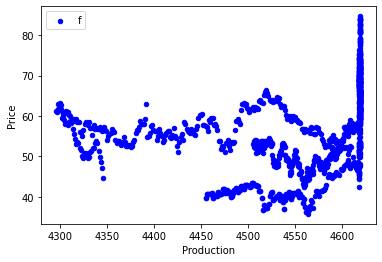

In [91]:
bx = complete.plot(kind='scatter', x='Production',y='Price',color = 'Blue',label ='f')

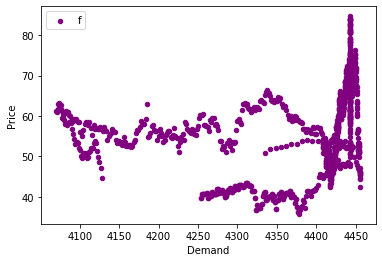

In [92]:
bx = complete.plot(kind='scatter', x='Demand',y='Price',color = 'Purple',label ='f')

In [94]:
#report = pp.ProfileReport(complete)
#report.to_file(output_file= 'pp.html')

In [96]:
s_report = sv.analyze(complete)
s_report.show_html('Sweetviz.html')

                                             |                                             | [  0%]   00:00 ->…

Report Sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
